In [1]:
import json
import pandas as pd #'1.0.4'
import numpy as np
import os
import seaborn as sn
import matplotlib.pyplot as plt
#import Json
#from pandas_ml import ConfusionMatrix

In [2]:
hu = pd.read_csv("../Data/SampleHu.csv")
notHu = pd.read_csv("../Data/SampleNotHu.csv")

In [3]:
#read names of json files, should be the same for all three models
path_to_json = "../Data/COCO/"
jsonFiles = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [4]:
actual1 = pd.DataFrame(np.ones(9481),index = hu.SourceFile, columns = ["actual"])
actual2 = pd.DataFrame(np.zeros(9481),index = notHu.SourceFile, columns = ["actual"])
actual = pd.concat([actual1, actual2])
actual

,actual
SourceFile,
100_HH_11_5_18100_BTCF_T/IMG_0318.JPG,1.0
100_HH_11_5_18100_BTCF_T/IMG_0321.JPG,1.0
100_HH_11_5_18100_BTCF_T/IMG_0322.JPG,1.0
100_HH_11_5_18100_BTCF_T/IMG_0325.JPG,1.0
100_HH_11_5_18100_BTCF_T/IMG_0326.JPG,1.0
...,...
127_HH_1_6_18_T/101RECNX/IMG_1499.JPG,0.0
127_HH_1_6_18_T/101RECNX/IMG_1500.JPG,0.0
127_HH_1_6_18_T/101RECNX/IMG_1503.JPG,0.0


In [5]:
def ReadJSON_p(path, precision):
    dic = {}
    con = precision
    for j in jsonFiles:
        with open(path + j) as f:
            data = json.load(f)
        name = j.replace("+", "/").replace("_keypoints.json", ".JPG")
        dic[name] = 0 #default
        if len(data["people"]) != 0:
            for p in data["people"]:
                max_con = max(p["pose_keypoints_2d"][2:45:3])
                if max_con >= con:
                    dic[name] = 1  
    return dic

In [6]:
def CM_p(path, p):#draw confusion matrix
    df = pd.DataFrame.from_dict(ReadJSON_p(path, p), orient='index', columns=["predicted"])
    n = len(df.index)
    df = df.merge(actual, left_index=True, right_index=True)
    cf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'])
    print(cf_matrix)
    cf_matrix = cf_matrix.to_numpy()
    #sn.heatmap(cf_matrix, annot=True)
    #ax = sn.heatmap(cf_matrix, annot=True, fmt = '.1f', square=1, linewidth=1.)
    #for t in ax.texts: t.set_text(str(float("{:.2f}".format(float(t.get_text()) / n * 100))) + " %")
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.show()
    return cf_matrix

In [7]:
#BODY25 = CM("../Data/BODY25/")
#COCO = CM("../Data/COCO/")
#MPI = CM("../Data/MPI/")

In [8]:
def calstats(m):
    tn = m[0][0]#True Neg
    fp = m[0][1]#False Pos
    fn = m[1][0]#False Neg
    tp = m[1][1]#True Pos
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1score = (2 * tp) / (2 * tp + fp + fn)
    return {"accuracy":accuracy, "precision":precision, "recall":recall, "f1score":f1score}

Predicted     0     1
Actual               
0.0        8556   925
1.0        4403  5078


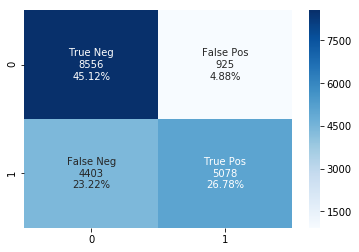

{'accuracy': 0.7190169813310833,
 'precision': 0.8459103781442612,
 'recall': 0.5355975108110959,
 'f1score': 0.6559028674761044}

In [14]:
#BODY25 = CM_p("../Data/BODY25/",0)
#Predicted     0     1
#Actual               
#0.0        6404  3077
#1.0        3264  6217

BODY25 = CM_p("../Data/BODY25/", 0.5)
calstats(BODY25)



In [10]:
print(BODY25[0][0])#True Neg
print(BODY25[0][1])#False Pos
print(BODY25[1][0])#False Neg
print(BODY25[1][1])#True Pos

8556
925
4403
5078
